# Project - Medical Effectiveness Evaluation
#### By Gerardo Mora Cuevas

### Machine Learning Integration and Model Evaluation

### Dataset: Early Treatment with Prednisolone or Acyclovir in Bell's Palsy

Let's load the csv file as a dataframe:

In [1]:
import pandas as pd
df=pd.read_csv("Bells Palsy Clinical Trial.csv")
df.head()

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes


Let's define the predictor variables (features) and the target variable:

In [2]:
X = df[["Sex", "Age", "Baseline Score on House–Brackmann scale", "Time between onset of symptoms and start of treatment","Received Prednisolone", "Received Acyclovir"]]
y = df["Full Recovery in 3 Months"]

Now let's convert categorical variables into dummy variables (one-hot encoding):

In [3]:
X = pd.get_dummies(X,drop_first=True)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 8 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Age                                                                  494 non-null    int64
 1   Baseline Score on House–Brackmann scale                              494 non-null    int64
 2   Sex_Male                                                             494 non-null    bool 
 3   Time between onset of symptoms and start of treatment_>48 to ≤72 hr  494 non-null    bool 
 4   Time between onset of symptoms and start of treatment_Unknown        494 non-null    bool 
 5   Time between onset of symptoms and start of treatment_Within 24 hr   494 non-null    bool 
 6   Received Prednisolone_Yes                                            494 non-null    bool 
 7   Received Acyclovir_Yes     

In [5]:
X

,Age,Baseline Score on House–Brackmann scale,Sex_Male,Time between onset of symptoms and start of treatment_>48 to ≤72 hr,Time between onset of symptoms and start of treatment_Unknown,Time between onset of symptoms and start of treatment_Within 24 hr,Received Prednisolone_Yes,Received Acyclovir_Yes
0,77,6,False,False,False,True,True,False
1,61,6,False,False,False,True,True,False
2,46,4,False,False,False,False,True,False
3,46,3,False,False,False,True,True,False
4,42,3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
489,40,5,True,False,False,False,False,False
490,37,3,True,False,False,False,False,False
491,56,3,False,False,False,False,False,False
492,33,4,True,False,False,True,False,False


Now, with train_test_split I will divide the data into train and test sets:

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (395, 8)
x_test:  (99, 8)
y_train:  (395,)
y_test:  (99,)


I already have the test and train data, so let's develop machine learning models:

#### Random Forest Classification

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

#### Random Forest Evaluation

In [9]:
y_pred_forest = random_forest.predict(x_test)

accuracy_forest = accuracy_score(y_test,y_pred_forest)
report_forest = classification_report(y_test,y_pred_forest)

print(f"Accuracy: {accuracy_forest:.2f}")
print("Classification Report:\n",report_forest)



Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

          No       0.28      0.28      0.28        18
         Yes       0.84      0.84      0.84        81

    accuracy                           0.74        99
   macro avg       0.56      0.56      0.56        99
weighted avg       0.74      0.74      0.74        99



#### Support Vector Machine (SVM)

In [10]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(x_train,y_train)

SVC(random_state=42)

#### Support Vector Machine (SVM) Evaluation

In [11]:
y_pred_svm = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test,y_pred_svm)
report_svm = classification_report(y_test,y_pred_svm)

print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n",report_svm)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

          No       0.60      0.17      0.26        18
         Yes       0.84      0.98      0.90        81

    accuracy                           0.83        99
   macro avg       0.72      0.57      0.58        99
weighted avg       0.80      0.83      0.79        99



#### Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

#### Gradient Boosting Evaluation

In [13]:
y_pred_gradient_boosting = gradient_boosting.predict(x_test)

accuracy_gradient_boosting = accuracy_score(y_test,y_pred_gradient_boosting)
report_gradient_boosting = classification_report(y_test,y_pred_gradient_boosting)

print(f"Accuracy: {accuracy_gradient_boosting:.2f}")
print("Classification Report: \n",report_gradient_boosting)

Accuracy: 0.77
Classification Report: 
               precision    recall  f1-score   support

          No       0.35      0.33      0.34        18
         Yes       0.85      0.86      0.86        81

    accuracy                           0.77        99
   macro avg       0.60      0.60      0.60        99
weighted avg       0.76      0.77      0.77        99



#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr.fit(x_train,y_train)

D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#### Logistic Regression Evaluation

In [15]:
y_pred_lr = lr.predict(x_test)

accuracy_lr = accuracy_score(y_test,y_pred_lr)
report_lr = classification_report(y_test,y_pred_lr)

print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report: \n",report_lr)

Accuracy: 0.78
Classification Report: 
               precision    recall  f1-score   support

          No       0.38      0.33      0.35        18
         Yes       0.86      0.88      0.87        81

    accuracy                           0.78        99
   macro avg       0.62      0.60      0.61        99
weighted avg       0.77      0.78      0.77        99



#### K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

#### K-Nearest Neighbors (KNN) Evaluation

In [17]:
y_pred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test,y_pred_knn)
report_knn = classification_report(y_test,y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report: \n", report_knn)

Accuracy: 0.74
Classification Report: 
               precision    recall  f1-score   support

          No       0.32      0.39      0.35        18
         Yes       0.86      0.81      0.84        81

    accuracy                           0.74        99
   macro avg       0.59      0.60      0.59        99
weighted avg       0.76      0.74      0.75        99



#### Support Vector Machine (SVM Polinomic Kernel)

In [18]:
poly_svm = SVC(kernel="poly",random_state=42)

poly_svm.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [19]:
y_pred_poly_svm = poly_svm.predict(x_test)

accuracy_poly_svm = accuracy_score(y_test,y_pred_poly_svm)
report_poly_svm = classification_report(y_test,y_pred_poly_svm)

print(f"Accuracy: {accuracy_poly_svm:.2f}")
print("Classification Report: \n",report_poly_svm)

Accuracy: 0.83
Classification Report: 
               precision    recall  f1-score   support

          No       0.67      0.11      0.19        18
         Yes       0.83      0.99      0.90        81

    accuracy                           0.83        99
   macro avg       0.75      0.55      0.55        99
weighted avg       0.80      0.83      0.77        99



Now that I've developed machine learning models, let's compare the accuracy between them with a bar graph to see which is more accurate:

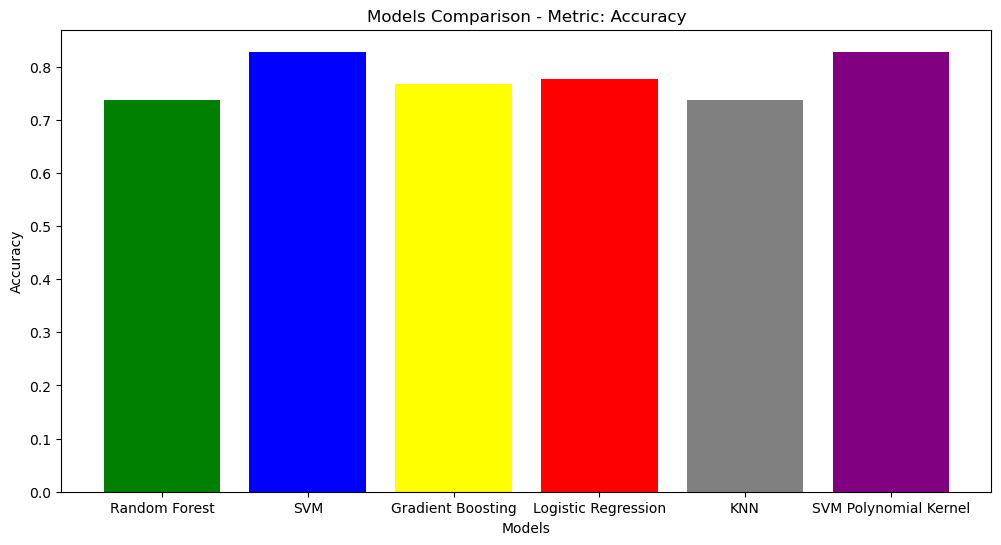

In [20]:
import matplotlib.pyplot as plt
model_names = ["Random Forest", "SVM", "Gradient Boosting", "Logistic Regression", "KNN", "SVM Polynomial Kernel"]
accuracy_scores = [accuracy_forest, accuracy_svm, accuracy_gradient_boosting, accuracy_lr, accuracy_knn, accuracy_poly_svm]

colors=["green","blue","yellow","red","gray","purple"]

plt.figure(figsize=(12,6))
plt.bar(model_names,accuracy_scores,color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Comparison - Metric: Accuracy")
plt.show()